In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
    

In [4]:
train_dataset = train.flow_from_directory(r"C:\Users\Administrator\Desktop\AI&ML\Training and Validation/",target_size=(150,150),batch_size = 32,class_mode = 'binary')

Found 1832 images belonging to 2 classes.


In [5]:
test_dataset = train.flow_from_directory("C:\\Users\\Administrator\\Desktop\\AI&ML\\Testing\\",target_size=(150,150),batch_size =32,class_mode = 'binary')

Found 68 images belonging to 2 classes.


In [6]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 56s 862ms/step - accuracy: 0.8114 - loss: 0.3914 - val_accuracy: 0.8971 - val_loss: 0.1986
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 753ms/step - accuracy: 0.9500 - loss: 0.1472 - val_accuracy: 0.8824 - val_loss: 0.3794
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 742ms/step - accuracy: 0.9482 - loss: 0.1584 - val_accuracy: 0.9118 - val_loss: 0.4524
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 47s 801ms/step - accuracy: 0.9559 - loss: 0.1207 - val_accuracy: 0.8824 - val_loss: 0.2104
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 778ms/step - accuracy: 0.9697 - loss: 0.0974 - val_accuracy: 0.9118 - val_loss: 0.2928
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 43s 738ms/step - accuracy: 0.9715 - loss: 0.0883 - val_accuracy: 0.9412 - val_loss: 0.1154
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 43s 737ms/step - accuracy: 0.9850 - loss: 0.0587 - val_accuracy: 0.8676 - val_loss: 0.3795
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 742ms/step - accuracy: 0.9774 - loss: 0.0768 - val_accuracy: 0.941

In [10]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step


In [11]:
predictions

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [12]:
print(len(predictions))

68


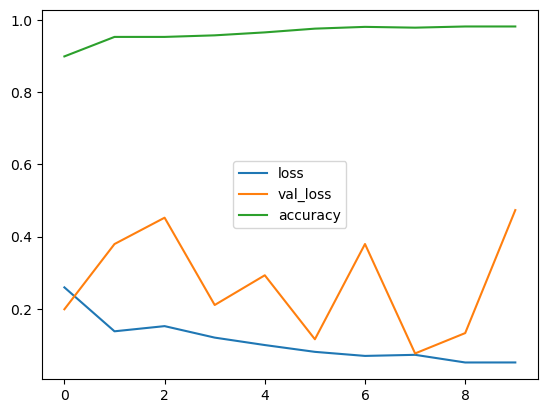

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

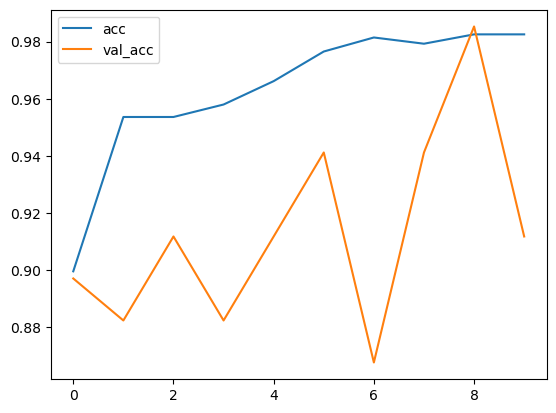

In [14]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
[[0.]]


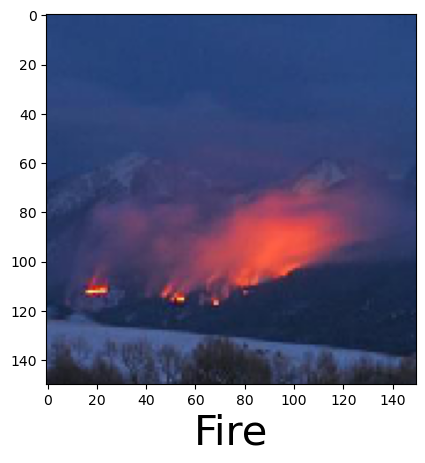

In [16]:
predictImage("C:\\Users\\Administrator\\Desktop\\AI&ML\\Testing\\fire\\abc180.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.]]


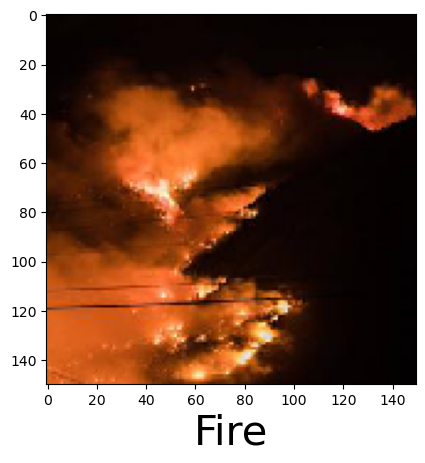

In [17]:
predictImage("C:\\Users\\Administrator\\Desktop\\AI&ML\\Testing\\fire\\abc177.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.]]


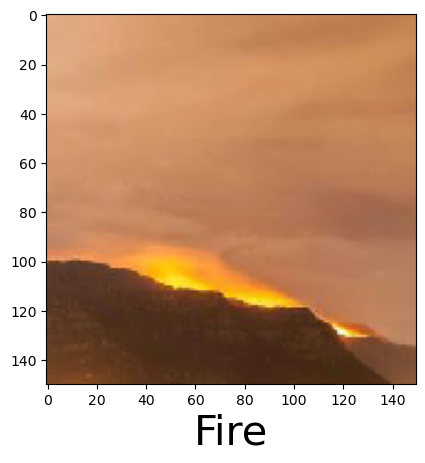

In [18]:
predictImage("C:\\Users\\Administrator\\Desktop\\AI&ML\\Testing\\fire\\abc185.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1.]]


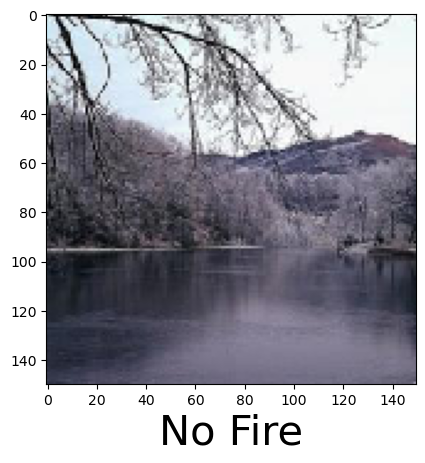

In [19]:
predictImage("C:\\Users\\Administrator\\Desktop\\AI&ML\\Testing\\nofire\\abc345.jpg")